# Feature selection

In [1]:
# loading data using .env file
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, OneHotEncoder
from sklearn.model_selection import train_test_split
from scipy import stats
from dotenv import load_dotenv

dotenv_path = os.getcwd()+'\\local.env'
load_dotenv(dotenv_path=dotenv_path)

%matplotlib inline

In [2]:
col_additional =['age','job','marital','education','default','housing','loan','contact','month',\
      'day_of_week','duration','campaign','pdays','previous','poutcome','emp_var_rate',\
      'cons_price_idx','cons_conf_idx','euribor3m','nr_employed','y']
df = pd.read_csv(os.getenv('bank_additional_data'), sep=';')
df.columns = col_additional
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.drop(['contact', 'pdays', 'poutcome'], axis=1, inplace=True)
df.shape

(41188, 18)

In [4]:
import math

df['dur_bin'] = df.duration.map(lambda x: int(math.floor(x/10)*10))

# Data Preprocessing

The features with unknown values such as job, marital, housing, loan etc where the proportion of unknowns is not very high we shall drop the records 

In [7]:
df.drop(df[(df.job == 'unknown')].index, axis=0, inplace=True)
df.drop(df[(df.marital == 'unknown')].index, axis=0, inplace=True)
df.drop(df[(df.housing == 'unknown')].index, axis=0, inplace=True)
df.drop(df[(df.loan == 'unknown')].index, axis=0, inplace=True)
df.drop(df[(df.education == 'unknown')].index, axis=0, inplace=True)
df.shape

(38245, 19)

In [8]:
for i in df:
    if df[i].dtype in ['object', 'bool']:
        print(f"_________{i}___________")
        print(df[i].value_counts())

_________job___________
admin.           9937
blue-collar      8560
technician       6380
services         3716
management       2728
retired          1577
entrepreneur     1360
self-employed    1349
housemaid         987
unemployed        963
student           688
Name: job, dtype: int64
_________marital___________
married     23183
single      10760
divorced     4302
Name: marital, dtype: int64
_________education___________
university.degree      11821
high.school             9244
basic.9y                5856
professional.course     5100
basic.4y                4002
basic.6y                2204
illiterate                18
Name: education, dtype: int64
_________default___________
no         30485
unknown     7757
yes            3
Name: default, dtype: int64
_________housing___________
yes    20578
no     17667
Name: housing, dtype: int64
_________loan___________
no     32286
yes     5959
Name: loan, dtype: int64
_________month___________
may    12794
jul     6630
aug     5822
jun    

In [11]:
df = df[df.duration > 5]

### for removal of outliers we need to check if the data is normal and if we can use zscore or percentile and whether outlier removal in necessary at all

In [13]:
from scipy.stats import skew, kurtosis

In [15]:
for i in df:
    if df[i].dtype in ['int64', 'float64']:
        print(f"_____{i}_____")
        print(f"skewness: {skew(df[i])}")
        print(f"kurtosis: {kurtosis(df[i])}")
        print()

_____age_____
skewness: 0.8042629682113953
kurtosis: 0.8211261523469053

_____duration_____
skewness: 3.2987729048982937
kurtosis: 20.798849346943793

_____campaign_____
skewness: 4.720512066279162
kurtosis: 35.31528463847809

_____previous_____
skewness: 3.8225668150304326
kurtosis: 20.129894785154853

_____emp_var_rate_____
skewness: -0.7207096356217643
kurtosis: -1.0655160176134437

_____cons_price_idx_____
skewness: -0.20758045620224036
kurtosis: -0.8382101045140398

_____cons_conf_idx_____
skewness: 0.3072539701306952
kurtosis: -0.3654094680360931

_____euribor3m_____
skewness: -0.7113480559893431
kurtosis: -1.4022759768079995

_____nr_employed_____
skewness: -1.0450788425695046
kurtosis: 0.012392816778068472

_____dur_bin_____
skewness: 3.2974698587216738
kurtosis: 20.77918689412611



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


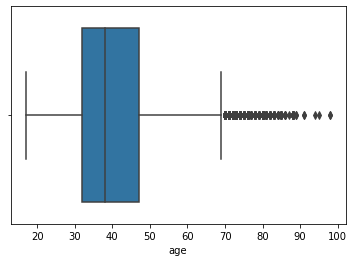

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


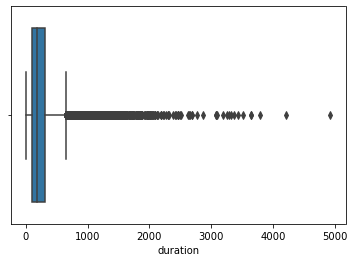

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


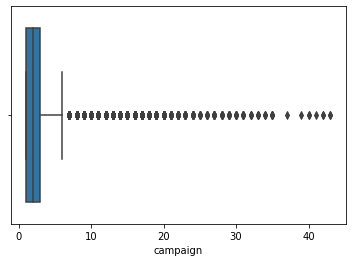

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


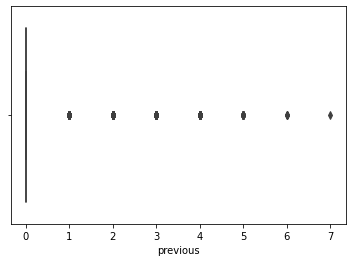

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


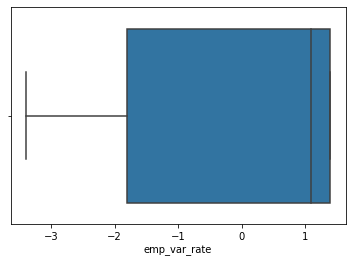

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


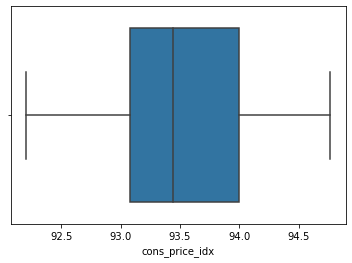

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


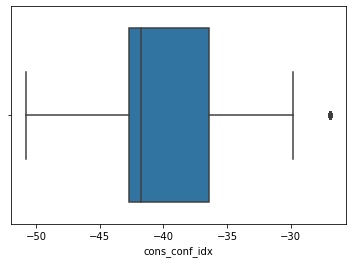

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


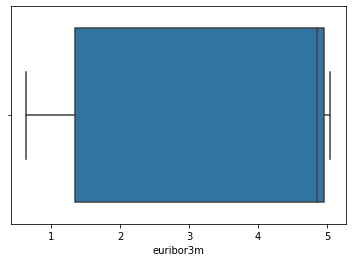

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


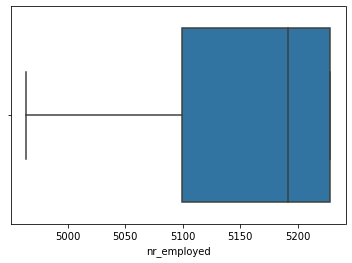

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


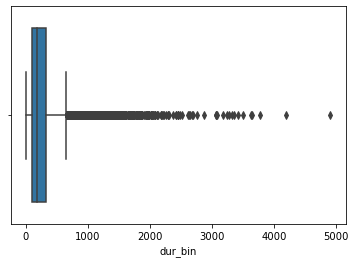

In [18]:
for i in df:
    if df[i].dtype in ['int64', 'float64']:
        sns.boxplot(df[i])
        plt.show()

In [32]:
df1 = df[df.campaign <= df.campaign.quantile(0.90)]

In [37]:
df[df.duration >= df.age.quantile(0.90)].y.value_counts()

no     30742
yes     4257
Name: y, dtype: int64

#### other outlier removal will result in considerable data loss so we shall move ahead with label encoding

# Label Encoding

In [38]:
le = LabelEncoder()

def label_encode(df):
    classes = {}
    for i in df:
        if df[i].dtype in ['object', 'bool']:
            df[i] = le.fit_transform(df[i])
            classes.update(**{i: le.classes_})
            
    return classes

classes = label_encode(df1)
classes

<ipython-input-38-1480f604bf72>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])


{'job': array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed'], dtype=object),
 'marital': array(['divorced', 'married', 'single'], dtype=object),
 'education': array(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
        'professional.course', 'university.degree'], dtype=object),
 'default': array(['no', 'unknown', 'yes'], dtype=object),
 'housing': array(['no', 'yes'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'month': array(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
        'sep'], dtype=object),
 'day_of_week': array(['fri', 'mon', 'thu', 'tue', 'wed'], dtype=object),
 'y': array(['no', 'yes'], dtype=object)}

In [39]:
df1.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,dur_bin
0,56,3,1,0,0,0,0,6,1,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,260
1,57,7,1,3,1,0,0,6,1,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,140
2,37,7,1,3,0,1,0,6,1,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,220
3,40,0,1,1,0,0,0,6,1,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0,150
4,56,7,1,3,0,0,1,6,1,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,300


## values of duration cons_price_idx and nr_employed needs to be scaled down also we need to have a column for no of loans that adds up housing and other loans

In [40]:
df1['no_of_loans'] = df1.housing + df1.loan

from sklearn.preprocessing import scale

<ipython-input-40-ac2bbe82a7fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['no_of_loans'] = df1.housing + df1.loan


In [42]:
# converting duration to minutes which scales down the values so no need to scale the conversation
df1['duration'] = df1.duration/60

<ipython-input-42-5a1af752afc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['duration'] = df1.duration/60


In [44]:
df1.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,dur_bin,no_of_loans
0,56,3,1,0,0,0,0,6,1,4.350000,1,0,1.1,93.994,-36.4,4.857,5191.0,0,260,0
1,57,7,1,3,1,0,0,6,1,2.483333,1,0,1.1,93.994,-36.4,4.857,5191.0,0,140,0
2,37,7,1,3,0,1,0,6,1,3.766667,1,0,1.1,93.994,-36.4,4.857,5191.0,0,220,1
3,40,0,1,1,0,0,0,6,1,2.516667,1,0,1.1,93.994,-36.4,4.857,5191.0,0,150,0
4,56,7,1,3,0,0,1,6,1,5.116667,1,0,1.1,93.994,-36.4,4.857,5191.0,0,300,1


In [46]:
df1.cons_price_idx = scale(df1.cons_price_idx)
df1.nr_employed = scale(df1.nr_employed)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


# Now lets move forward towards feature selection

In [50]:
X = pd.concat([df1.iloc[:,:-3], df1.iloc[:, -2:]], axis=1)
y = df1.y

In [51]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=20)

model.fit(X, y)

RandomForestClassifier(random_state=20)

In [54]:
feature_imp = pd.DataFrame(model.feature_importances_, index=X.columns).sort_values(0, ascending=False)

In [59]:
X = df1[list(feature_imp.iloc[:15,:].index)]

# Model Selection

Here we shall use the KFold Cross validation to distribute the validation data and test data accordingly and then we shall use the cross_validation_score to check how each model performs along with validations so lets start with the usual train test split

In [60]:
test_size = 0.25
random_seed = 19

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

Here we shall test on SVM and XGBoost later on as these require some heavy compute

In [68]:
models = {
    'logr': LogisticRegression(),
    'knn': KNeighborsClassifier(),
    'Kmeans': KMeans(),
    'naive_bayes': GaussianNB(),
    'MLP': MLPClassifier()
}

In [69]:
from sklearn.model_selection import KFold, cross_val_score

In [72]:
model_report = {}
for key, value in models.items():
    
    # lets first create k folds of our dataset
    kfold = KFold(n_splits=10, random_state=15, shuffle=True)
    
    # now lets train and varify each model's cross validations score
    cv_report = cross_val_score(value, X, y=y, cv=kfold, scoring='accuracy')
    model_report.update(**{
        key: (cv_report, cv_report.mean(), cv_report.std())
    })

model_report

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

{'logr': (array([0.90048474, 0.90647277, 0.89421158, 0.90419162, 0.89221557,
         0.90846878, 0.90846878, 0.89104392, 0.90958357, 0.89845978]),
  0.901360110843426,
  0.006731822221752647),
 'knn': (array([0.87738808, 0.89449672, 0.88964927, 0.88964927, 0.88252067,
         0.89592244, 0.89250071, 0.88419852, 0.89446663, 0.88904735]),
  0.888983966709235,
  0.005665584798319078),
 'Kmeans': (array([0.37553464, 0.09039065, 0.05531794, 0.36954662, 0.37125749,
         0.37268321, 0.03393214, 0.15830006, 0.38904735, 0.08300057]),
  0.229901064955087,
  0.14881486611163985),
 'naive_bayes': (array([0.86683775, 0.85799829, 0.87225549, 0.86683775, 0.87197035,
         0.87339607, 0.87510693, 0.87621221, 0.867085  , 0.86737022]),
  0.8695070050592321,
  0.005120529286931819),
 'MLP': (array([0.89449672, 0.9047619 , 0.88993442, 0.90504705, 0.89421158,
         0.8905047 , 0.89734816, 0.89589276, 0.90387906, 0.89703366]),
  0.8973110010115862,
  0.0052806992361068535)}

In [73]:
# clearly logistic regression is the way to go